# packege python

telechagement de paquer reki

In [1]:
!pip insatll numpy
!pip install pandas
!pip install plotly
!pip insatll sklearn
!pip install nbformat
!pip install geopandas
!pip install contextily
!pip install tensorflow
!pip install matplotlib
!pip install --upgrade nbformat

ERROR: unknown command "insatll" - maybe you meant "install"
ERROR: unknown command "insatll" - maybe you meant "install"


importation de packer

In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
import geopandas as gpd7
import contextily as ctx
import plotly.express as px
import matplotlib.pyplot as plt
from shapely.geometry import Point


# importation de la data et clearing


charcgement da la data et afichage des premier lign.

In [3]:
data = pd.read_csv("https://jp-sartoris.online/data.csv", sep=";") #df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/earthquakes-23k.csv')
data.head()

,lat,long,depth,mag,stations
0,-20.42,181.62,562,4.8,41
1,-20.62,181.03,650,4.2,15
2,-26.00,184.10,42,5.4,43
3,-17.97,181.66,626,4.1,19
4,-20.42,181.96,649,4.0,11


verification si il ya des donner null

In [4]:
data.isnull().sum() #on verifi sa ya des null

lat         0
long        0
depth       0
mag         0
stations    0
dtype: int64

voir les propieter des donner

In [5]:
data.info() #voir les infomraltion en +

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   lat       1000 non-null   float64
 1   long      1000 non-null   float64
 2   depth     1000 non-null   int64  
 3   mag       1000 non-null   float64
 4   stations  1000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 39.2 KB


# data visualitation

vusualisation des outsateu et des moynne


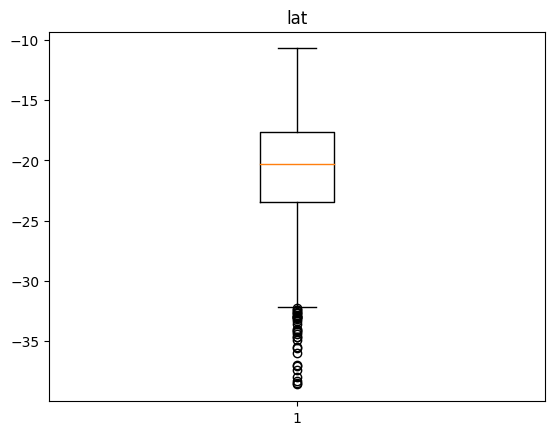

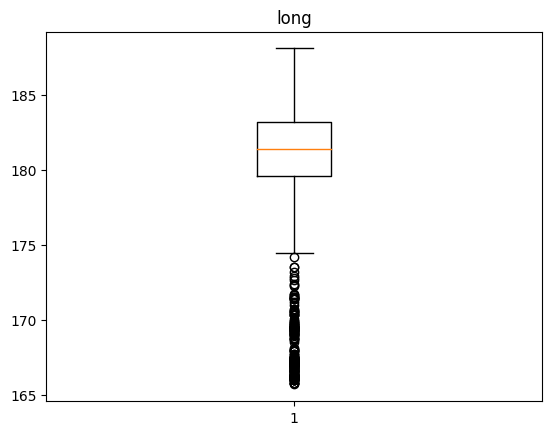

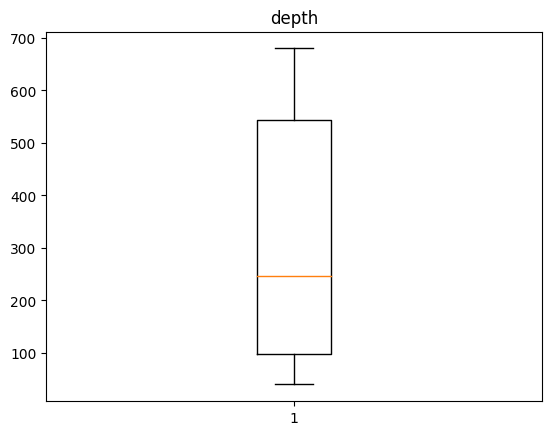

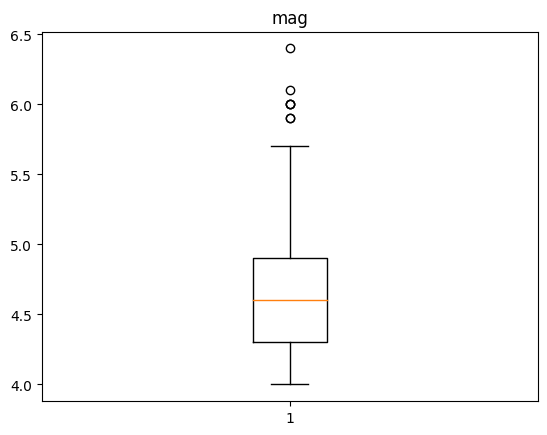

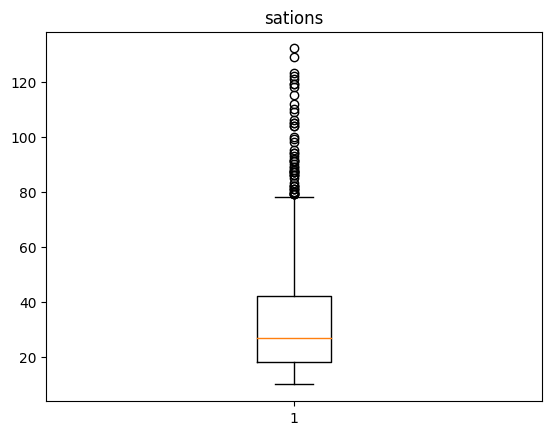

In [6]:
plt.boxplot([data["lat"]])
plt.title('lat')
plt.show()

plt.boxplot(data['long'])
plt.title('long')
plt.show()

plt.boxplot(data['depth'])
plt.title('depth')
plt.show()

plt.boxplot(data['mag'])
plt.title('mag')
plt.show()

plt.boxplot(data['stations'])
plt.title('sations')
plt.show()


Text(0.5, 1.0, 'nombre de sceisme pas magetude')

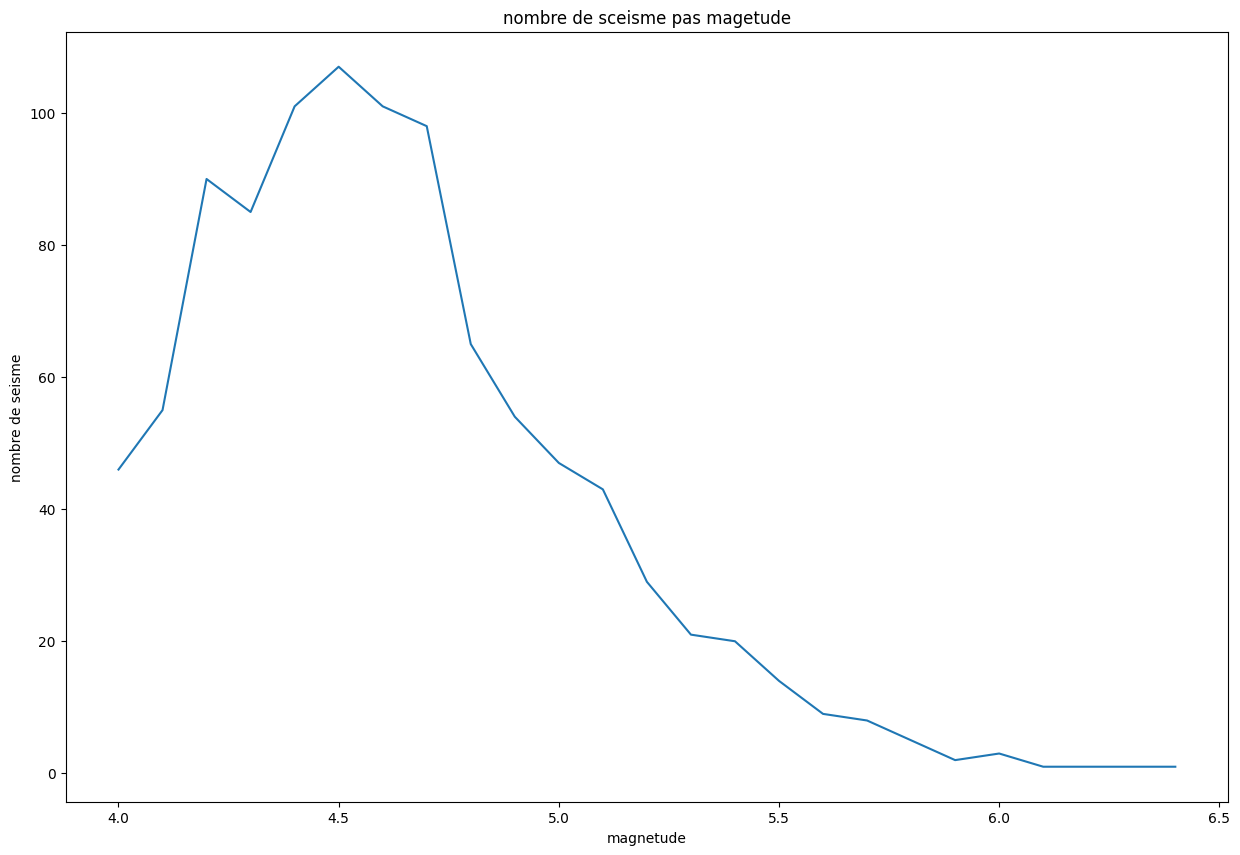

In [7]:
plt.figure(figsize=(15, 10))
fd = data[["mag","depth"]]
fd = fd.groupby(["mag"]).count()
plt.plot(fd)

plt.ylabel('nombre de seisme')
plt.xlabel('magnetude')
plt.title('nombre de sceisme pas magetude')

In [40]:
data.loc[data['mag'] > 6].values

array([[-20.7 , 169.92, 139.  ,   6.1 ,  94.  ],
       [-15.56, 167.62, 127.  ,   6.4 , 122.  ]])

Text(0.5, 1.0, 'magnetute en fonction de le profondeur')

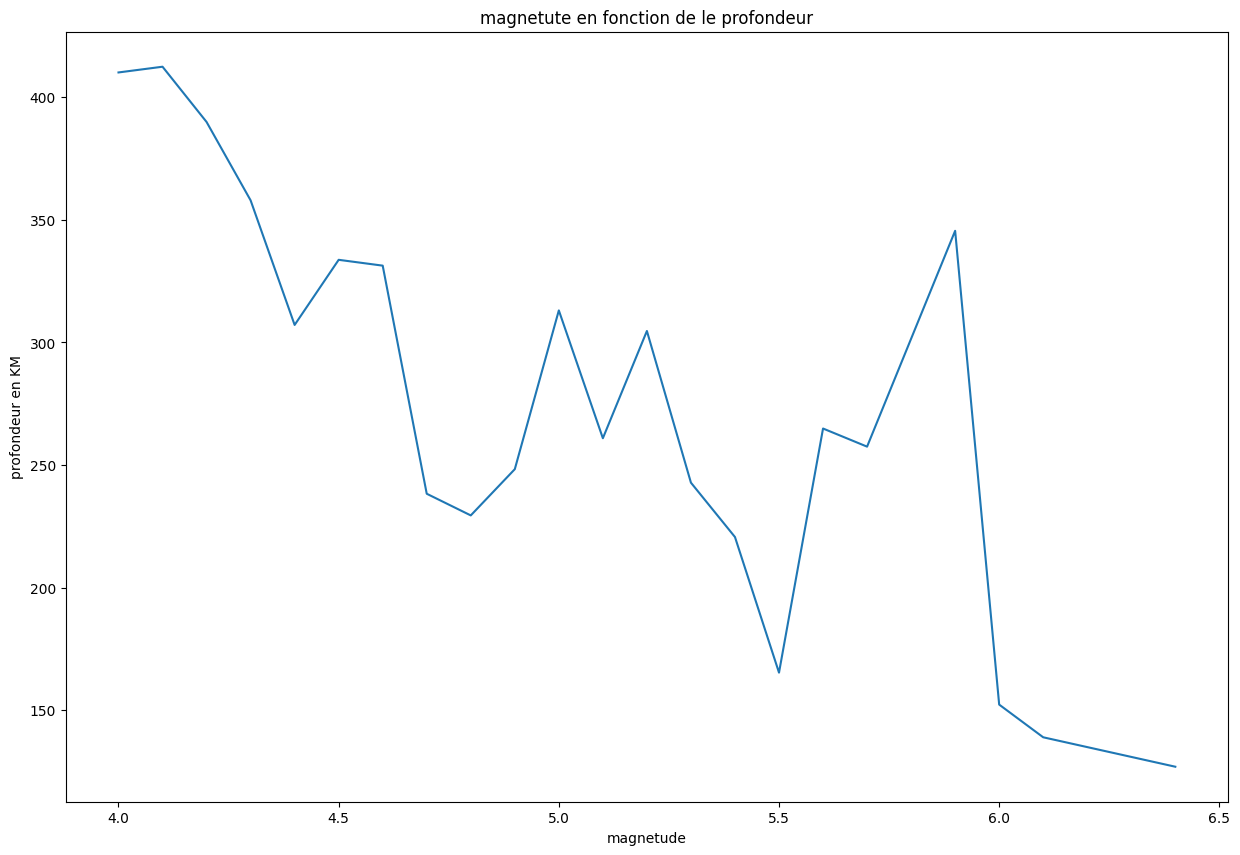

In [8]:
plt.figure(figsize=(15, 10))
fd = data[["mag","depth"]]
fd = fd.groupby(["mag"]).mean() #.mean()
plt.plot(fd)

plt.ylabel('profondeur en KM')
plt.xlabel('magnetude')
plt.title('magnetute en fonction de le profondeur')

Text(0.5, 1.0, 'nonbre de station qui on resentie le sceism en par magnetude')

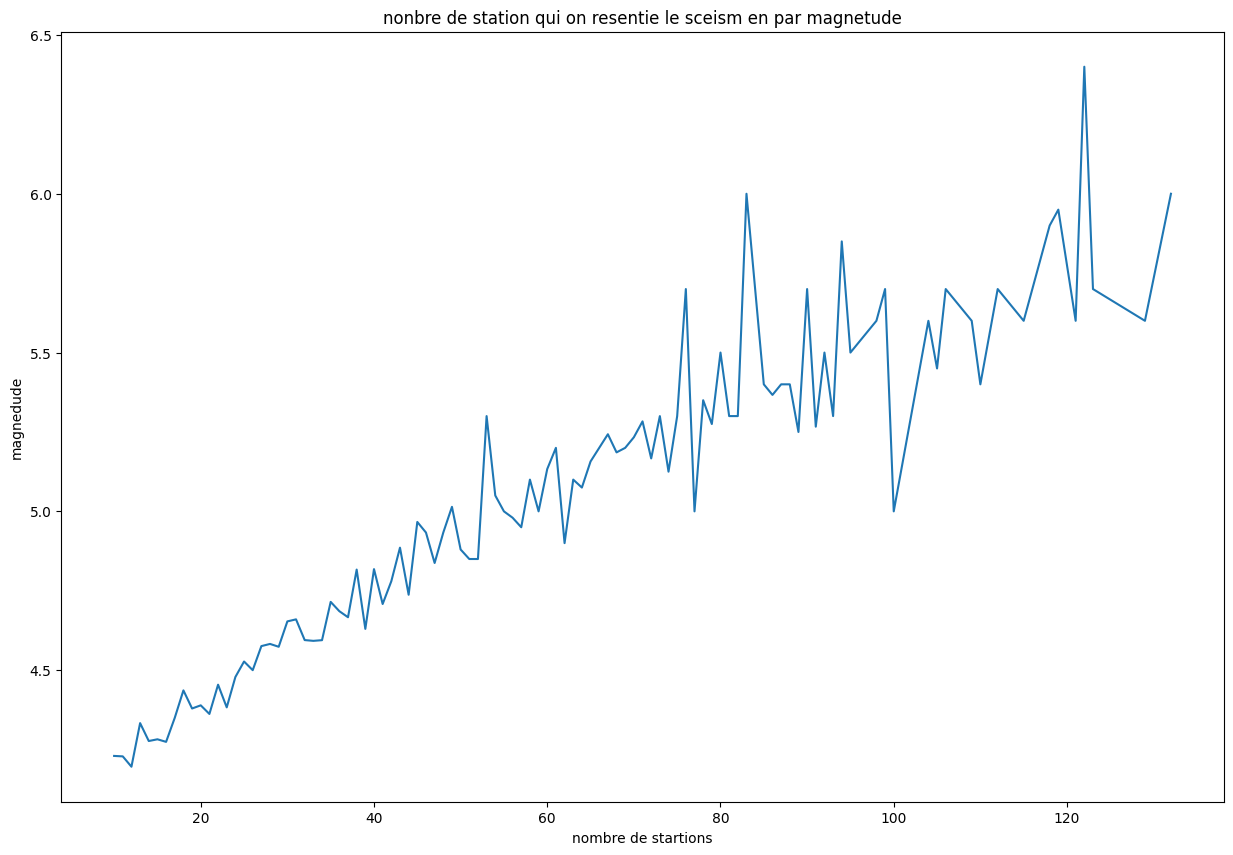

In [9]:
plt.figure(figsize=(15, 10))

fd = data[["mag","stations"]]
fd = fd.groupby(["stations"]).mean()
plt.plot(fd)

plt.ylabel('magnedude')
plt.xlabel('nombre de startions')
plt.title('nonbre de station qui on resentie le sceism en par magnetude')

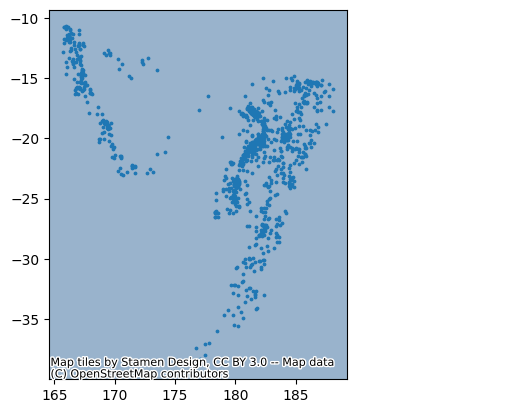

In [10]:


# Create the GeoDataFrame
gdf = gpd.GeoDataFrame(
    {'lon': data["long"], 'lat': data["lat"]},
    geometry=gpd.points_from_xy(data["long"], data["lat"]))

# Plot the data

ax = gdf.plot(markersize=3)

# Add a map as the background and zoom in to level 15
ctx.add_basemap(ax, zoom=15, crs=gdf.crs)
# Show the plot
plt.show()


-33.63969241783398, *150.95048848561237*

In [11]:
fig = px.density_mapbox(data, lat='lat', lon='long', radius=9,
                        center=dict(lat=-25.78, lon=177.72), zoom=2,
                        #mapbox_style="white-bg"
                        ) #stamen-terrain

fig.update_layout(
    mapbox_style="white-bg",
    mapbox_layers=[
        {
            "below": 'traces',
            "sourcetype": "raster",
            "sourceattribution": "United States Geological Survey",
            "source": [
                "https://basemap.nationalmap.gov/arcgis/rest/services/USGSImageryOnly/MapServer/tile/{z}/{y}/{x}"
            ]
        }
      ])

fig.update_layout(width=800, height=600)

fig.update_layout(title='repartution sur la carte', title_x=0.5, title_font=dict(size=25, family='Arial, sans-serif'))

fig.show()

# = preparation des data au fit model IA =


In [12]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

from sklearn.linear_model import LogisticRegression

2023-01-23 16:09:09.357899: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-23 16:09:09.504295: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-23 16:09:09.504325: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-23 16:09:10.346337: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [13]:
data = pd.read_csv("https://jp-sartoris.online/data.csv", sep=";") #df = pd.read_csv('https://raw.githubusercontent.com/plotly/datasets/master/earthquakes-23k.csv')
data.head()

,lat,long,depth,mag,stations
0,-20.42,181.62,562,4.8,41
1,-20.62,181.03,650,4.2,15
2,-26.00,184.10,42,5.4,43
3,-17.97,181.66,626,4.1,19
4,-20.42,181.96,649,4.0,11


In [14]:
X = data.drop(labels="mag", axis=1)
Y = data['mag']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

X_train,Y_train,X_train.shape, X_test.shape

(       lat    long  depth  stations
 687 -17.61  183.32    356        15
 500 -16.51  187.10     62        46
 332 -27.33  182.60     42        11
 979 -23.00  170.70     43        20
 817 -16.21  186.52    111        30
 ..     ...     ...    ...       ...
 835 -15.85  185.90    121        17
 192 -17.87  182.00    569        12
 629 -18.48  182.37    376        57
 559 -13.56  166.49     83        25
 684 -15.35  186.40     98        17
 
 [800 rows x 4 columns],
 687    4.2
 500    4.9
 332    4.4
 979    4.9
 817    4.8
       ... 
 835    4.1
 192    4.6
 629    4.8
 559    4.5
 684    4.4
 Name: mag, Length: 800, dtype: float64,
 (800, 4),
 (200, 4))

# ANN

In [15]:
# Création d'un modèle séquentiel
model = Sequential()

# Ajout de la première couche de neuronne cachée avec une fonction d'activation relu
model.add(Dense(units=2048, activation='relu', input_dim=4))

# Ajout de la première couche de neuronne cachée avec une fonction d'activation relu
model.add(Dense(units=1024, activation='relu'))

# Ajout de la deuxième couche de neuronne cachée avec une fonction d'activation relu
model.add(Dense(units=512, activation='relu'))

# Ajout de la deuxième couche de neuronne cachée avec une fonction d'activation relu
model.add(Dense(units=256, activation='relu'))

# Ajout de la deuxième couche de neuronne cachée avec une fonction d'activation relu
model.add(Dense(units=128, activation='relu'))

# Ajout de la deuxième couche de neuronne cachée avec une fonction d'activation relu
model.add(Dense(units=64, activation='relu'))

# Ajout de la deuxième couche de neuronne cachée avec une fonction d'activation relu
model.add(Dense(units=32, activation='relu'))

# Ajout de la deuxième couche de neuronne cachée avec une fonction d'activation relu
model.add(Dense(units=16, activation='relu'))

# Ajout de la deuxième couche de neuronne cachée avec une fonction d'activation relu
model.add(Dense(units=8, activation='relu'))

# Ajout de la deuxième couche de neuronne cachée avec une fonction d'activation relu
model.add(Dense(units=4, activation='relu'))

# Ajout de la deuxième couche de neuronne cachée avec une fonction d'activation relu
model.add(Dense(units=2, activation='relu'))

# Ajout de la couche de neuronne de sortie avec une fonction d'activation sigmoïde
model.add(Dense(units=1)) #activation=' ' )) sigmoid softmax relu

# Compilation du modèle avec une fonction de coût log loss et un optimiseur Adam
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

2023-01-23 16:09:11.372144: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-01-23 16:09:11.372869: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-23 16:09:11.373015: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2023-01-23 16:09:11.373136: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2023-01-23 16:09:11.373260: W tensorflow/c

In [16]:
model.fit(X_train, Y_train, batch_size=32,epochs = 100, validation_data=(X_test,Y_test))

Epoch 1/100
25/25 [==============================] - 3s 39ms/step - loss: 71.1803 - accuracy: 0.0000e+00 - val_loss: 71.6257 - val_accuracy: 0.0000e+00
Epoch 2/100
25/25 [==============================] - 1s 29ms/step - loss: 71.1804 - accuracy: 0.0000e+00 - val_loss: 71.6257 - val_accuracy: 0.0000e+00
Epoch 3/100
25/25 [==============================] - 1s 28ms/step - loss: 71.1804 - accuracy: 0.0000e+00 - val_loss: 71.6257 - val_accuracy: 0.0000e+00
Epoch 4/100
25/25 [==============================] - 1s 29ms/step - loss: 71.1803 - accuracy: 0.0000e+00 - val_loss: 71.6257 - val_accuracy: 0.0000e+00
Epoch 5/100
25/25 [==============================] - 1s 29ms/step - loss: 71.1803 - accuracy: 0.0000e+00 - val_loss: 71.6257 - val_accuracy: 0.0000e+00
Epoch 6/100
25/25 [==============================] - 1s 29ms/step - loss: 71.1804 - accuracy: 0.0000e+00 - val_loss: 71.6257 - val_accuracy: 0.0000e+00
Epoch 7/100
25/25 [==============================] - 1s 30ms/step - loss: 71.1803 - accu

In [17]:
# Convertir la liste en dataframe pandas
#df = pd.DataFrame([[-15.94,184.95,306,11]])#4.3
#df = pd.DataFrame([[-21.68,180.63,617,63]])#5 
df = pd.DataFrame([[-14.28,170.34,642,29]])#4.7
#df = pd.DataFrame([[49.130111693866255, 2.2864298195198254,250,56]])

# Effectuer une prédiction sur les données
prediction = model.predict(df)

print(prediction) 

1/1 [==============================] - 0s 208ms/step
[[0.]]


# LinearRegression


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [46]:
linmodel = LinearRegression().fit(X_train, Y_train) 
linmodel.fit(X_train, Y_train)
linmodel.score(X_train, Y_train)

0.7677997161847486

In [47]:
linmodel.score(X_test,Y_test)

0.7830636763036731

In [48]:
cross_val_score(linmodel,X_test, Y_test, cv=5)

array([0.8230947 , 0.66658987, 0.70254923, 0.76669835, 0.8827719 ])

In [49]:
# Convertir la liste en dataframe pandas
#df = pd.DataFrame([[-15.94,184.95,306,11]])#4.3
#df = pd.DataFrame([[-21.68,180.63,617,63]])#5 
#df = pd.DataFrame([[-14.28,170.34,642,29]])#4.7
#df = pd.DataFrame([[49.130111693866255, 2.2864298195198254,250,56]])
df = pd.DataFrame([[-15.56, 167.62, 127, 122]]) #6.4

# Effectuer une prédiction sur les données
prediction = model.predict(poly.transform(df))

print(prediction)

[6.09330016]


/home/utilisateur/Bureau/SARTORIS_mesures_des_tremblements_de_terre_sur_l_île_de_Fiji/venv/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names



============================================

# random forest

In [23]:
grid_search_mod = 0
if grid_search_mod == 0:
  rf = RandomForestRegressor(max_depth=7, min_samples_split=22, n_estimators = 185, random_state = 1)

  rf.fit(X_train, Y_train)

  y_pred=rf.predict(X_test)
  print(rf.score(X_train,Y_train))
else:
  param_grid = {
    'n_estimators': range(180,190),
    'max_depth': range(0,10),
    'min_samples_split': range(20,30)
  }

  from sklearn.model_selection import GridSearchCV
  rf = RandomForestRegressor()
  grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 1)
  grid_search.fit(X_train, Y_train)
  print(grid_search.best_params_)

0.8545083749842532


In [24]:
rf.score(X_test,Y_test)

0.7780923746857665

In [25]:
cross_val_score(rf,X_test, Y_test, cv=5)

array([0.76915965, 0.73283004, 0.71242265, 0.67019054, 0.81979224])

In [42]:
# Convertir la liste en dataframe pandas
#df = pd.DataFrame([[-15.94,184.95,306,11]])#4.3
#df = pd.DataFrame([[-21.68,180.63,617,63]])#5 
#df = pd.DataFrame([[-14.28,170.34,642,29]])#4.7
#df = pd.DataFrame([[49.130111693866255, 2.2864298195198254,250,56]])
df = pd.DataFrame([[-15.56, 167.62, 127, 122]]) #6.4

# Effectuer une prédiction sur les données
prediction = rf.predict(df)

print(prediction) 

[5.79141635]


/home/utilisateur/Bureau/SARTORIS_mesures_des_tremblements_de_terre_sur_l_île_de_Fiji/venv/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning:

X does not have valid feature names, but RandomForestRegressor was fitted with feature names



In [27]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(rf, f)

In [28]:
from joblib import dump
# Sauvegarder le modèle
dump(rf, 'model.joblib')

['model.joblib']

# Polynomial Regression

In [29]:
from sklearn.preprocessing import PolynomialFeatures

In [30]:
# Transformer les données en termes polynomiaux
poly = PolynomialFeatures(degree=3)
x_poly = poly.fit_transform(X_train)

# Entraîner le modèle de régression polynomiale
model = LinearRegression()
model.fit(x_poly, Y_train)

LinearRegression()

In [31]:
cross_val_score(model,X_test, Y_test, cv=5)

array([0.8230947 , 0.66658987, 0.70254923, 0.76669835, 0.8827719 ])

In [32]:
model.score(poly.transform(X_test),Y_test)

0.7990255427120216

In [43]:
# Convertir la liste en dataframe pandas
#df = pd.DataFrame([[-15.94,184.95,306,11]])#4.3
#df = pd.DataFrame([[-21.68,180.63,617,63]])#5 
#df = pd.DataFrame([[-14.28,170.34,642,29]])#4.7
#df = pd.DataFrame([[49.130111693866255, 2.2864298195198254,250,56]])
df = pd.DataFrame([[-15.56, 167.62, 127, 122]]) #6.4

# Effectuer une prédiction sur les données
prediction = model.predict(poly.transform(df))

print(prediction) 

[6.09330016]


/home/utilisateur/Bureau/SARTORIS_mesures_des_tremblements_de_terre_sur_l_île_de_Fiji/venv/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning:

X does not have valid feature names, but PolynomialFeatures was fitted with feature names

